In [1]:
import pandas as pd
import numpy as np

In [2]:
df_titanic_train = pd.read_csv('titanic_train.csv')
df_titanic_test = pd.read_csv('titanic_test.csv')


In [3]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df_titanic_train['CabinBooked']  = df_titanic_train['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
df_titanic_test['CabinBooked']  = df_titanic_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [8]:
df_titanic_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)
df_titanic_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [9]:
df_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBooked
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [10]:
df_titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBooked
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,0


In [11]:
df_titanic_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

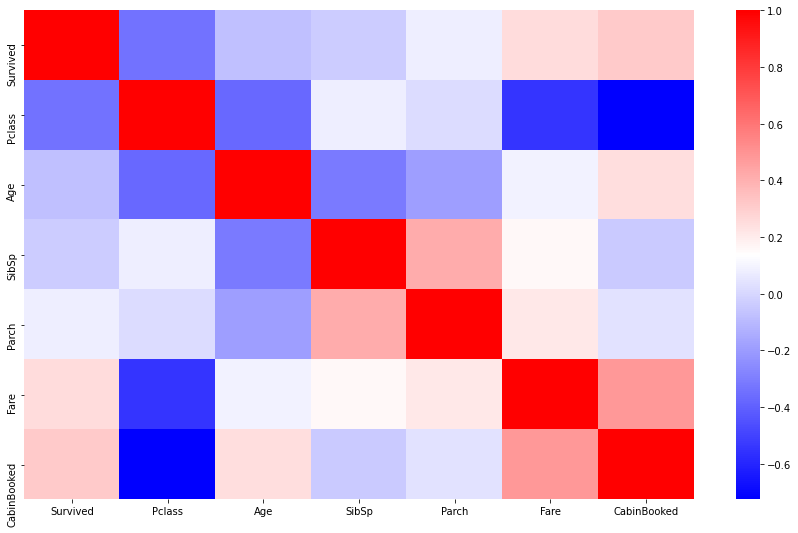

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,9))
sns.heatmap(df_titanic_train.corr(),cmap='bwr')
plt.show()

In [15]:
df_titanic_train['Embarked'].mode()

0    S
dtype: object

In [16]:
df_titanic_train['Embarked'].fillna('S',inplace=True)

In [17]:
df_titanic_test.isna().sum()

Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
CabinBooked     0
dtype: int64

In [18]:
df_titanic_train['Age'].fillna(df_titanic_train['Age'].median(),inplace=True)
df_titanic_test['Age'].fillna(df_titanic_train['Age'].median(),inplace=True)

In [19]:
df_titanic_test['Fare'].fillna(df_titanic_train['Fare'].median(),inplace=True)

In [20]:
df_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBooked
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [21]:
df_titanic_train = pd.get_dummies(df_titanic_train, columns = ['Sex','Embarked'],drop_first=True)
df_titanic_test = pd.get_dummies(df_titanic_test, columns = ['Sex','Embarked'],drop_first=True)

In [22]:
df_titanic_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinBooked',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df_titanic_test.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_titanic_train[['Age','Fare']] = scaler.fit_transform(df_titanic_train[['Age','Fare']])
df_titanic_test[['Age','Fare']] = scaler.transform(df_titanic_test[['Age','Fare']])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
X_train = df_titanic_train.drop(['Survived'],axis=1)
y_train = df_titanic_train[['Survived']]

In [ ]:
model.fit(X_train,y_train)

In [ ]:
pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, RocCurveDisplay,auc

In [ ]:
confusion_matrix(y_pred=pred, y_true=y_train)

In [ ]:
accuracy_score(y_pred=pred, y_true=y_train)

In [ ]:
(473+240)/(473+76+102+240)

In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [ ]:
240/(240+76)

In [ ]:
precision_score(y_pred=pred, y_true=y_train)

In [ ]:
recall_score(y_pred=pred, y_true=y_train)

In [ ]:
240/(240+102)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_score=pred, y_true=y_train)
roc_auc = auc(fpr, tpr)

In [ ]:
print(roc_auc)

In [ ]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')

In [ ]:
display.plot()